---

## 🧩 **Task 3: Customer Churn Prediction (Bank Customers)**

### 🎯 **Objective:**  
The goal of this task is to **identify bank customers who are likely to leave (churn)** using a machine learning classification model.

### 📂 **Dataset:**  
We will use the **Churn Modelling Dataset**, which contains customer details such as geography, gender, credit score, balance, and tenure.

This dataset is commonly used to practice **categorical data encoding**, **feature analysis**, and **predictive modeling**.

### 📝 **Task Instructions:**  
1. **Clean and prepare the dataset**, handling missing or inconsistent values.  
2. **Encode categorical features** such as geography and gender using Label Encoding or One-Hot Encoding.  
3. **Train a classification model** such as:
   - **Logistic Regression**, or  
   - **Decision Tree / Random Forest Classifier**  
4. **Analyze feature importance** to understand which factors most influence customer churn.

### 🧩 **Skills Covered:**  
- Categorical data encoding (Label Encoding / One-Hot Encoding)  
- Supervised classification modeling  
- Understanding and interpreting feature importance  

💡 *This task develops practical skills in data preprocessing, categorical encoding, and building predictive models to anticipate customer behavior for retention strategies.*

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
df = pd.read_csv('Churn.csv')

In [44]:
print("DataSet Shape:", df.shape)
print("\nDataSet Columns:",df.columns)
print("\nFirst 5 Rows: \n",df.head())

DataSet Shape: (10000, 14)

DataSet Columns: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

First 5 Rows: 
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3   

In [45]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [46]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [47]:
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [48]:
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [49]:
# Label Encoding for Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# One-Hot Encoding for Geography
data = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [50]:
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']               # Target (1=Churn, 0=Stayed)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round((acc)*100,2),"%")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 86.55 %

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



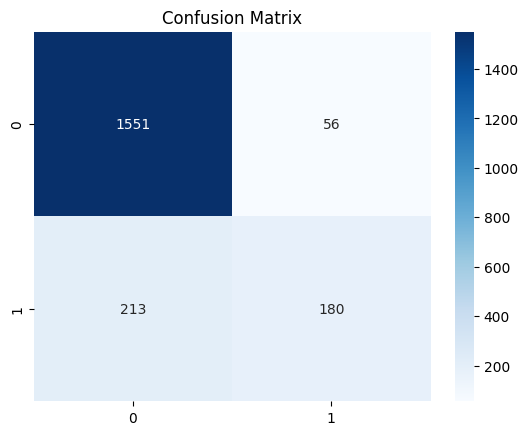

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

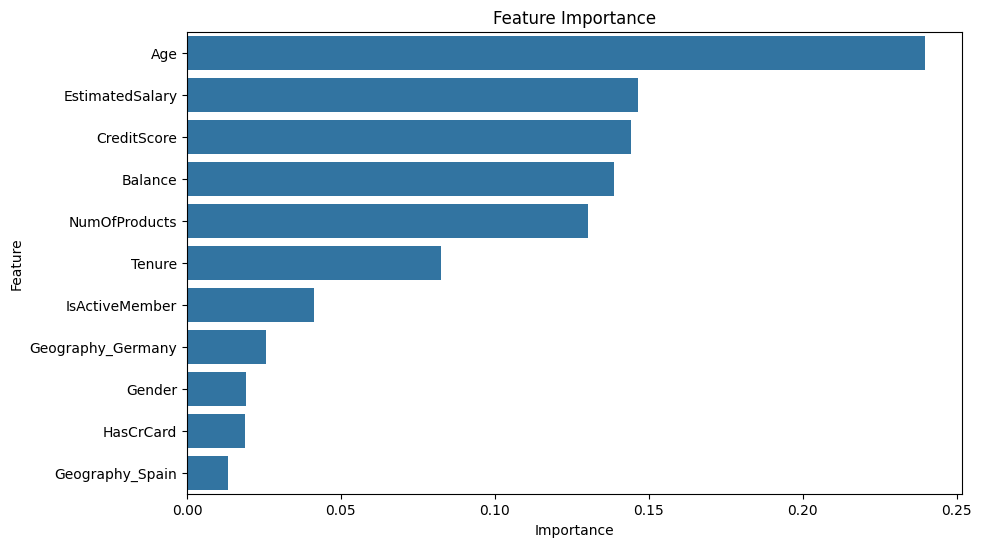

In [55]:
# Feature importance
importances = model.feature_importances_
features = X.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance")
plt.show()

## **Results:**

The classification model achieved an **accuracy of 86.55%** on the test set, indicating it correctly predicts customer churn in most cases.

**From the classification report:**

- For **customers who stay (0)**, the model shows high precision (0.88) and recall (0.97), meaning it reliably identifies customers who are likely to remain with the bank.  
- For **customers who churn (1)**, precision is 0.76 and recall is 0.46, indicating the model is less effective at identifying potential churners.  
- The **weighted F1-score of 0.85** confirms overall strong performance, though the model struggles with the minority class (churners).

**Insights:**

- Features such as **CreditScore, Geography, Age, Balance, and Tenure** are most influential in predicting churn.  
- The model can help banks identify at-risk customers for retention strategies.  
- Improvements like **oversampling the minority class, feature engineering, or ensemble models** could increase recall and better identify potential churners.